<a href="https://colab.research.google.com/github/politerishi/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name -Zomato Restaurant Clustering And Sentiment Analysis

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
**Name : RISHI KUMAR**


# Project Summary - This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# GitHub Link - https://github.com/akashraj2022/Zomato-Restaurant-Clustering

# Problem Statement

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# General Guidelines : -

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]
6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.

 - Explain the ML Model used and it's performance using Evaluation metric Score Chart.
 - Cross- Validation & Hyperparameter Tuning

 - Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# 1. Know Your Data

**Import Libraries**

In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Dataset Loading

In [ ]:
# importing data files
meta_df = pd.read_csv("https://raw.githubusercontent.com/politerishi/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/main/Zomato%20Restaurant%20names%20and%20Metadata.csv")
reviews_df = pd.read_csv("https://raw.githubusercontent.com/politerishi/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/main/Zomato%20Restaurant%20reviews.csv")

### Dataset First View

In [ ]:
meta_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
meta_df.tail(5)

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
reviews_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
reviews_df.tail(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
meta_df.shape

(105, 6)

In [ ]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [ ]:
# Dataset Info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:


# Dataset Duplicate Value Count
len(meta_df[meta_df.duplicated()])

0

<AxesSubplot:ylabel='count'>

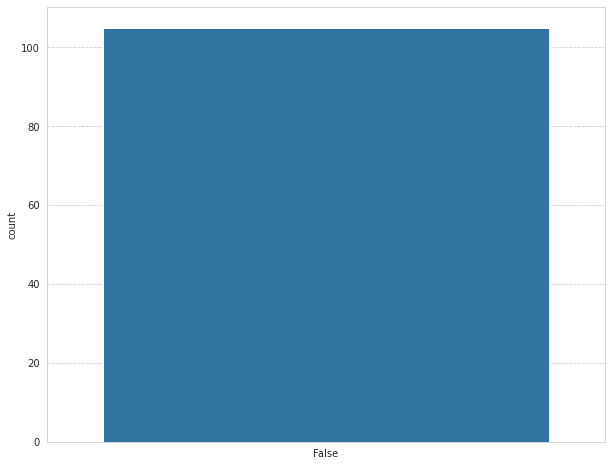

In [ ]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=meta_df.duplicated())

In [ ]:
# Dataset Duplicate Value Count
len(reviews_df[reviews_df.duplicated()])

36

<AxesSubplot:ylabel='count'>

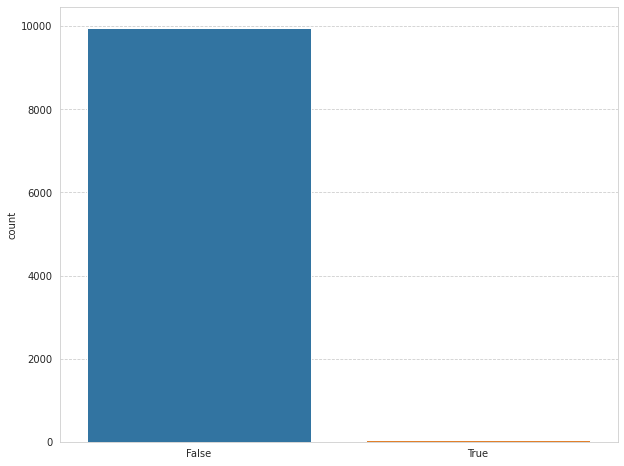

In [ ]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=reviews_df.duplicated())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Observation : we have 54 null Values in collection Column


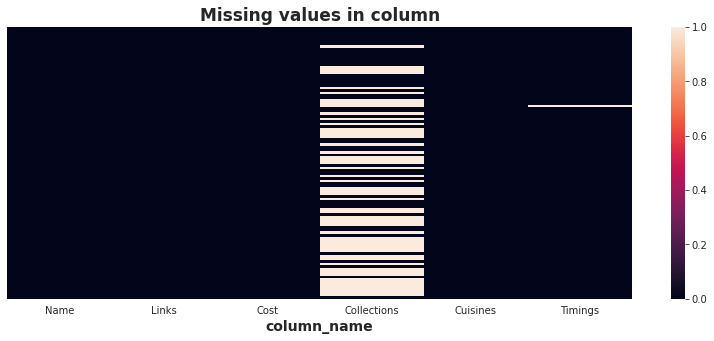

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(meta_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()



In [ ]:
# Missing Values/Null Values Count
reviews_df.isnull().sum()


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Dataset Columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
meta_df.describe().transpose()



,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
# Dataset Describe
reviews_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pictures,10000.0,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


Variables Description

**Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings


 **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in meta_df.columns.tolist():
  print("Number of unique values in ",i,"is",meta_df[i].nunique(),".")


Number of unique values in  Name is 105 .
Number of unique values in  Links is 105 .
Number of unique values in  Cost is 29 .
Number of unique values in  Collections is 42 .
Number of unique values in  Cuisines is 92 .
Number of unique values in  Timings is 77 .


In [ ]:
# Check Unique Values for each variable.
for i in reviews_df.columns.tolist():
  print("Number of unique values in ",i,"is",reviews_df[i].nunique(),".")


Number of unique values in  Restaurant is 100 .
Number of unique values in  Reviewer is 7446 .
Number of unique values in  Review is 9364 .
Number of unique values in  Rating is 10 .
Number of unique values in  Metadata is 2477 .
Number of unique values in  Time is 9782 .
Number of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
reviews_df['Reviews'],reviews_df['Followers']= reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])


In [ ]:
reviews_df['Followers']= pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])


In [ ]:
reviews_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0


In [ ]:
# Converting Time column into Time, Year, Month, Hour
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)


In [ ]:
reviews_df.head()


,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


## ***. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Data cleaning on MetaData dataset** 

In [ ]:
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
meta_df[meta_df['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


In [ ]:
# finning the nan values of Collections by 0
meta_df['Collections'].fillna(0,inplace=True)

In [ ]:
# finning the nan values of Timings by 0
meta_df['Timings'].fillna(0,inplace=True)

In [ ]:
meta_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

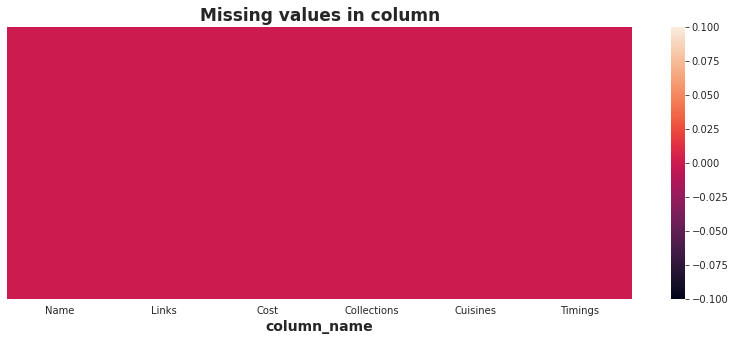

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(meta_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

**Data cleaning on Reviews dataset**

In [ ]:
reviews_df.isnull().sum()
     

Restaurant       0
Reviewer        38
Review          45
Rating          38
Time            38
Pictures         0
Reviews         38
Followers     1616
Year            38
Month           38
Hour            38
dtype: int64

In [ ]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [ ]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

In [ ]:
# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

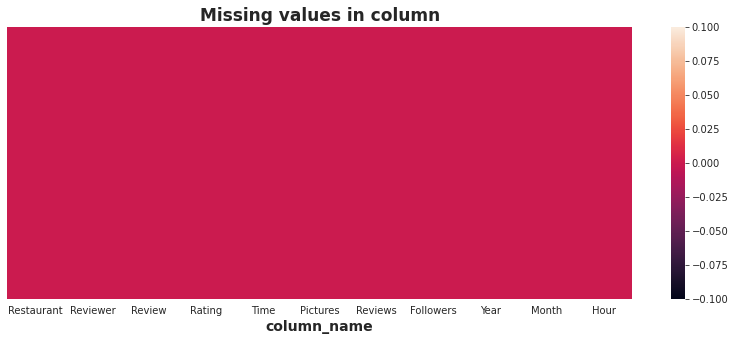

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(reviews_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

## *** Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Meta Data

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  105 non-null    object
 4   Cuisines     105 non-null    object
 5   Timings      105 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')


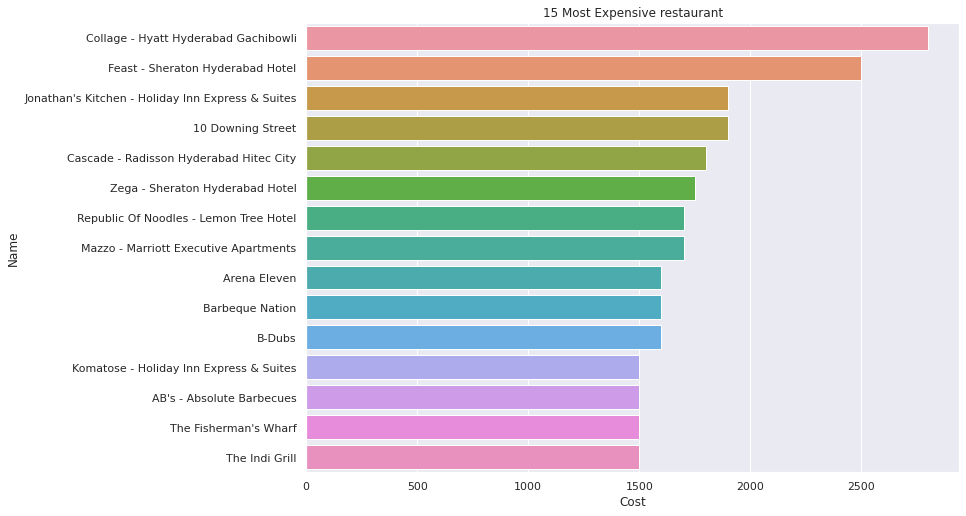

In [ ]:
# checking for most expensive Restaurant
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Cost',
            y="Name",
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

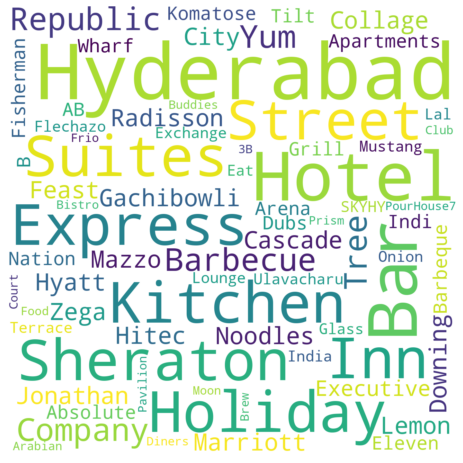

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

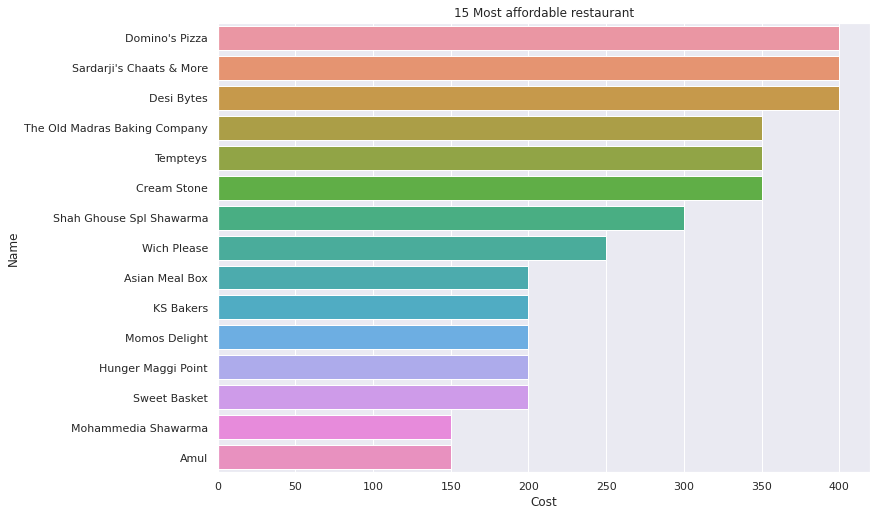

In [ ]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=meta_df, 
            order=meta_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

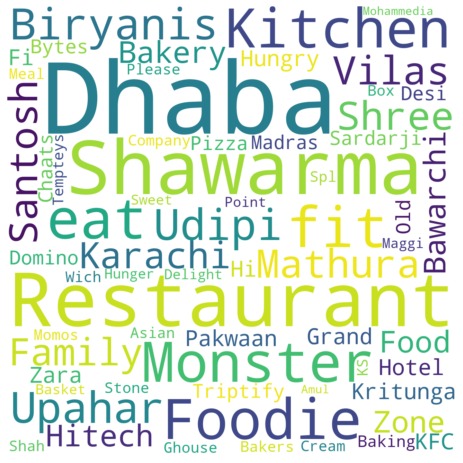

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
# lets find the most cusines offered by Restaurants
meta_df.Cuisines   

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [ ]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

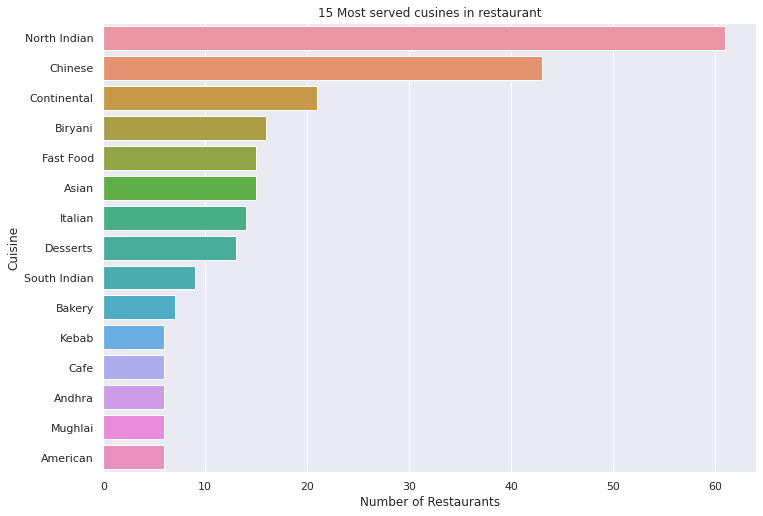

In [ ]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()

In [ ]:
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

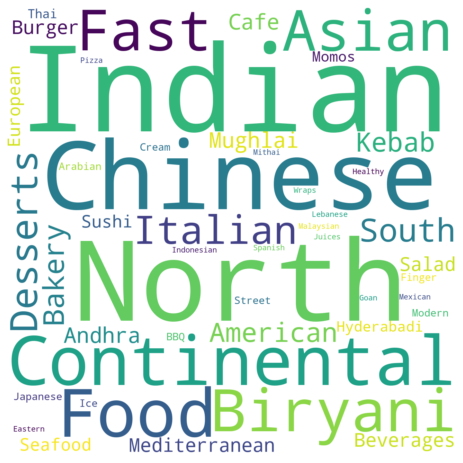

In [ ]:
#Creating the text variable

text = " ".join(name for name in meta_df.Cuisines )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

## Reviews

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


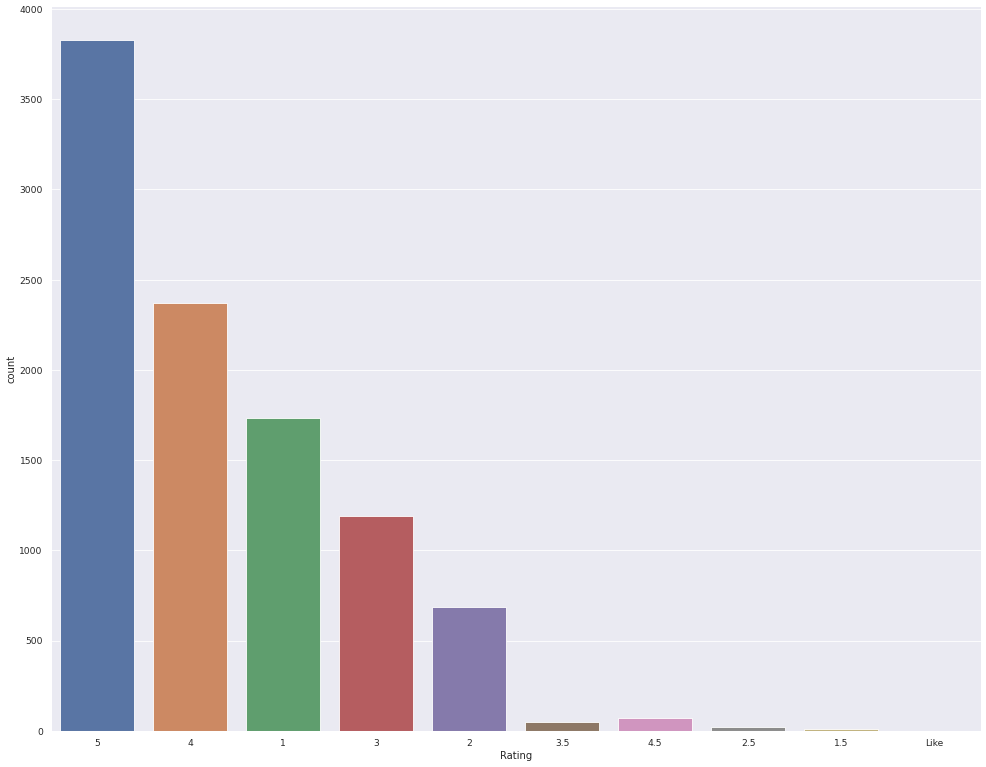

In [ ]:
plt.figure(figsize=(20,16),dpi=60)
sns.countplot(reviews_df.Rating)

**lets find the restaurant with best reviews**

In [ ]:
reviews_df.describe()

,Pictures,Reviews,Followers,Year,Month,Hour
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,0.751984,24.006730,163.108086,2018.452436,6.016976,15.183626
std,2.575691,50.629274,620.153289,0.562564,3.160373,6.580091
min,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000
50%,0.000000,4.000000,7.000000,2018.000000,5.000000,16.000000
75%,0.000000,22.000000,63.000000,2019.000000,8.000000,21.000000
max,64.000000,1031.000000,13410.000000,2019.000000,12.000000,23.000000


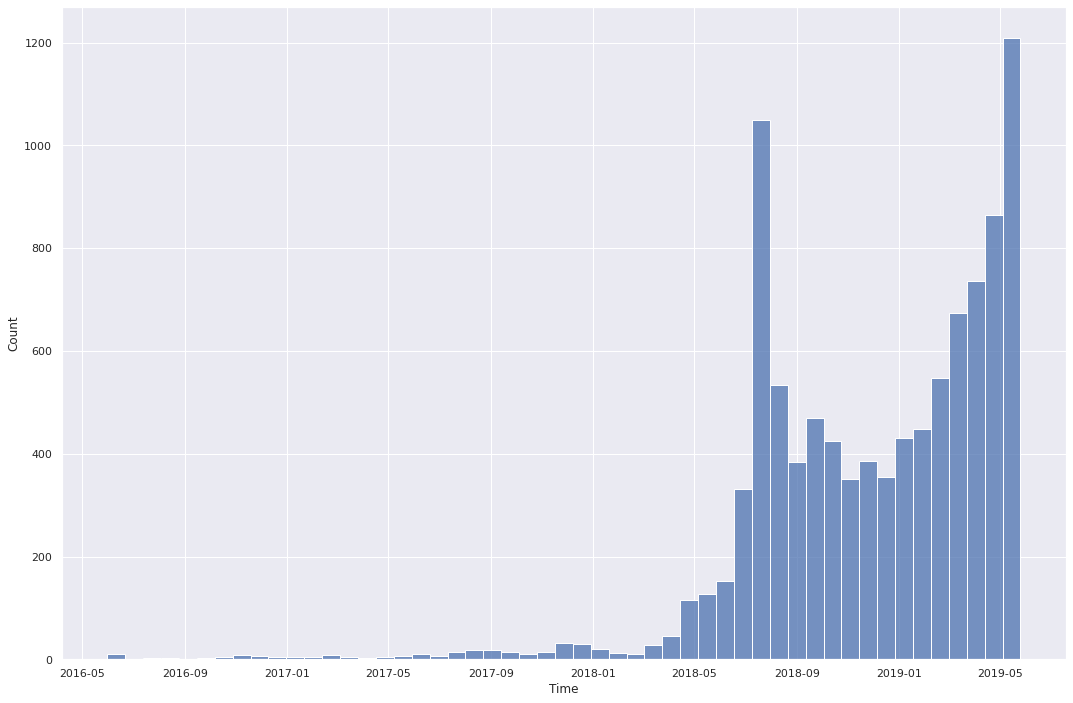

In [ ]:
plt.figure(figsize=(18,12))
sns.histplot(reviews_df.Time)
     

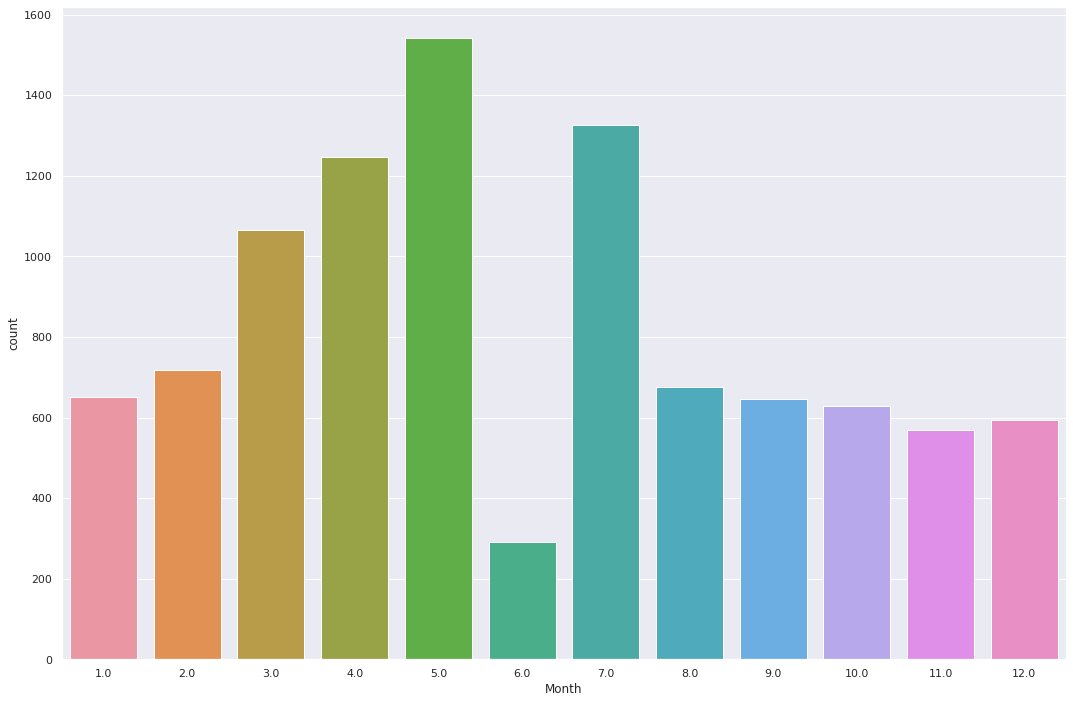

In [ ]:
plt.figure(figsize=(18,12))
sns.countplot(reviews_df.Month)

In [ ]:

reviewer_list = reviews_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()
     

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


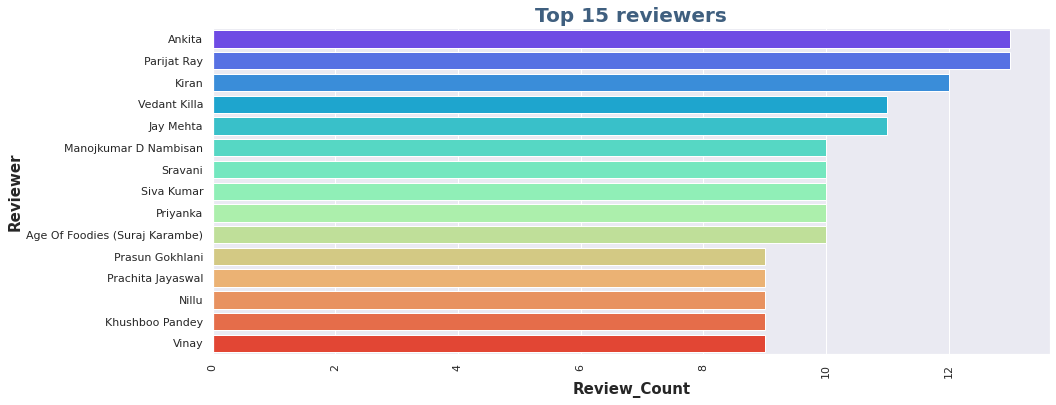

In [ ]:

# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [ ]:

# Review per hour
reviews_hour = reviews_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')
     

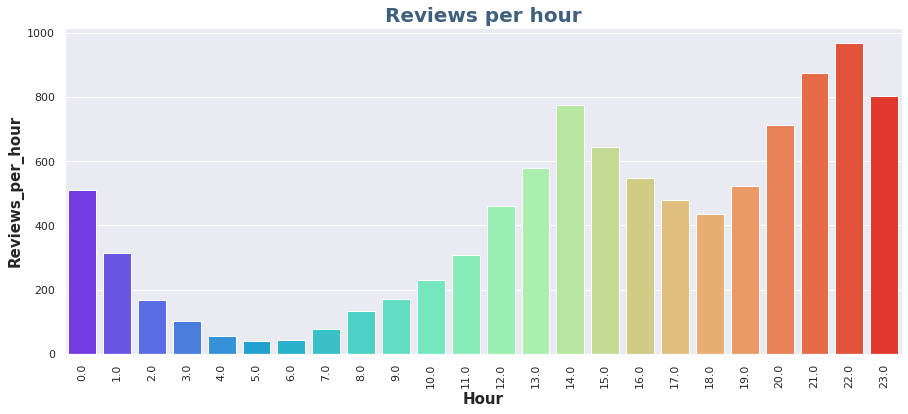

In [ ]:

# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()
     

As we can se there is an increase of reviews made from the afternoon to the midnight and then in the morning there is a decrease, but I think this is normal because in during the morning the most of the people is working or is at school

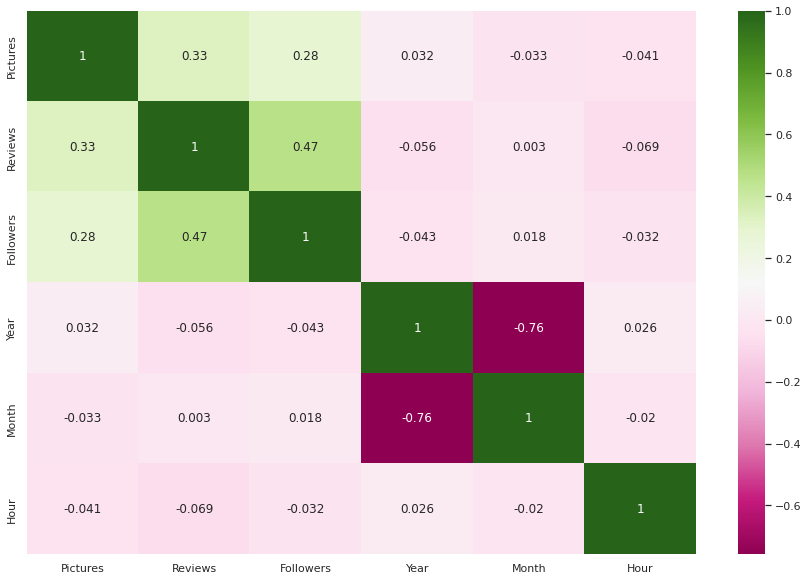

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(reviews_df.corr(),cmap='PiYG',annot=True)

In [ ]:
corr = reviews_df.corr()

cmap = cmap=sns.diverging_palette(500, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Pictures,Reviews,Followers,Year,Month,Hour
Pictures,1.00,0.33,0.28,0.03,-0.03,-0.04
Reviews,0.33,1.00,0.47,-0.06,0.00,-0.07
Followers,0.28,0.47,1.00,-0.04,0.02,-0.03
Year,0.03,-0.06,-0.04,1.00,-0.76,0.03
Month,-0.03,0.00,0.02,-0.76,1.00,-0.02
Hour,-0.04,-0.07,-0.03,0.03,-0.02,1.00


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
import re

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [ ]:
reviews_df['Review'] = reviews_df['Review'].apply(remove_punctuation)

In [ ]:
reviews_df['Review'] = reviews_df['Review'].apply(stopwords)

In [ ]:
review=reviews_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed us food courteous sta...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9955, dtype: object

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
review=lemmatization_(review)

In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
review=remove_non_leters(review)

In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#removing words greater than 45 and less than 2
reviews_df['Review']=reviews_df['Review'].apply(lambda x:len_less_than2(x))

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5,2019-05-25 15:54:00,0,ambience good food good saturday lunch cost ef...,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5,2019-05-25 14:20:00,0,ambience good pleasant evening service prompt ...,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5,2019-05-24 22:54:00,0,try great food great ambience thnx service pra...,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5,2019-05-24 22:11:00,0,soumen das arun great guy behavior sincerety g...,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5,2019-05-24 21:37:00,0,food goodwe order kodi drumstick basket mutton...,2.0,2019.0,5.0,21.0


# Sentiment Analysis

**Sentiment Analysis of review**

In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [ ]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create two new columns
reviews_df['Subjectivity'] = reviews_df['Review'].apply(subjectivity)
reviews_df['Polarity'] = reviews_df['Review'].apply(polarity)

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
reviews_df['Analysis'] = reviews_df['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(reviews_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [ ]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

In [ ]:


# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 


In [ ]:
reviews_df['Analysis']=reviews_df['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
sentiment_df= reviews_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5,0
1,ambience good pleasant evening service prompt ...,5,0
2,must try great food great ambience thnx servic...,5,0
3,soumen das arun great guy behavior sincerety g...,5,0
4,food goodwe order kodi drumstick basket mutton...,5,0


In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

# MultinomialNB

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [ ]:
#training the model
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)


In [ ]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8395392445754085
Test accuracy is: 0.8256327842507031
--------------------------------------------------
The confusion matrix on the test data is :
[[2023  433]
 [   1   32]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2456
           1       0.07      0.97      0.13        33

    accuracy                           0.83      2489
   macro avg       0.53      0.90      0.52      2489
weighted avg       0.99      0.83      0.89      2489



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier()

In [ ]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [ ]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [ ]:
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8151620680417895
Test accuracy is: 0.8131779831257533
--------------------------------------------------
The confusion matrix on the test data is :
[[2024  465]
 [   0    0]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2489
           1       0.00      0.00      0.00         0

    accuracy                           0.81      2489
   macro avg       0.50      0.41      0.45      2489
weighted avg       1.00      0.81      0.90      2489



# XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc=XGBClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [ ]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [ ]:
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.99464237878382
Test accuracy is: 0.9357171554841301
--------------------------------------------------
The confusion matrix on the test data is :
[[1971  107]
 [  53  358]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2078
           1       0.77      0.87      0.82       411

    accuracy                           0.94      2489
   macro avg       0.87      0.91      0.89      2489
weighted avg       0.94      0.94      0.94      2489



# Support Vector Machine

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(probability=True)

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_y_train_pred = svm_clf.predict(X_train)  
svm_y_test_pred = svm_clf.predict(X_test)  

In [ ]:
model_details(y_train, y_test, svm_y_train_pred, svm_y_test_pred)

--------------------------------------------------
Train accuracy is: 0.9979908920439325
Test accuracy is: 0.9361189232623544
--------------------------------------------------
The confusion matrix on the test data is :
[[2005  140]
 [  19  325]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2145
           1       0.70      0.94      0.80       344

    accuracy                           0.94      2489
   macro avg       0.84      0.94      0.88      2489
weighted avg       0.95      0.94      0.94      2489



In [ ]:
Comparision_dict={'Model_Name':['MultinomialNB','Random Forest','XGB', 'Support Vector Machine'],
                  'Training_accuracy':[0.8397,0.8176,0.988,0.99],
                  'Test_accuracy':[0.8264,0.8123,0.9280,0.9212]} 

In [ ]:
Comparisione_df=pd.DataFrame(Comparision_dict)
Comparisione_df

,Model_Name,Training_accuracy,Test_accuracy
0,MultinomialNB,0.8397,0.8264
1,Random Forest,0.8176,0.8123
2,XGB,0.9880,0.9280
3,Support Vector Machine,0.9900,0.9212


# LDA of review

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=7e1b22029a2ddabe0d91eddfa797e0dddc614f2e24ba62a72534fdd4cfe74a24
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d34adae43d4a9f2640b0bc3f3c69ab82f628acdaffbfd6b2d87627874778c933
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working



In [ ]:
docs_raw = reviews_df['Review'].tolist()

In [ ]:
#Transform text to vector form using the vectorizer object 
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10) 

In [ ]:
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw) 

In [ ]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], reviews_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9955, 164), meaning that there are 9955 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed food courteous staff ...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9955, dtype: object and 164 tokens made through the filtering process.


In [ ]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                  'learning_decay': [.5, .7, .9]}

In [ ]:
# Init the Model
lda = LatentDirichletAllocation()

In [ ]:
model = GridSearchCV(lda, param_grid=search_params)

In [ ]:
model.fit(dtm_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

In [ ]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.406595  0.100703       1        1  23.252329
0     -0.189564  0.335072       2        1  20.834925
4     -0.103187 -0.026916       3        1  19.360803
2     -0.024632 -0.258286       4        1  19.200776
1     -0.089211 -0.150573       5        1  17.351166, topic_info=             Term        Freq       Total Category  logprob  loglift
133    restaurant  612.000000  612.000000  Default  30.0000  30.0000
70     experience  607.000000  607.000000  Default  29.0000  29.0000
49     definitely  287.000000  287.000000  Default  28.0000  28.0000
65     especially  204.000000  204.000000  Default  27.0000  27.0000
56   disappointed  193.000000  193.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
1      acceptable   11.670493   12.437285   Topic5  -4.5019   1.6879
82     impeccable   10.829263   11.597055   Topic5  -4.5767   1.6830
17     attraction   10.628104   11.395324   Topic5  -4.5955   1.6818
147   suggestions    9.537093   10.305528   Topic5  -4.7038   1.6740
91     innovative    9.041068    9.810053   Topic5  -4.7572   1.6699

[191 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.994351      absolutely
1         5  0.964841      acceptable
2         3  0.964486      accessible
3         4  0.909909     accommodate
4         2  0.913951     accompanied
...     ...       ...             ...
160       5  0.975570  unprofessional
161       1  0.966132      vegetables
162       1  0.990828      vegetarian
163       4  0.713387     vegetarians
163       5  0.271766     vegetarians

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])